In [231]:
import numpy as np
from scipy.optimize import curve_fit
from IPython.html.widgets import interact, fixed
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
# fix random seed for reproducibility
np.random.seed(7)
import warnings
warnings.filterwarnings('ignore')

In [273]:
def func(X, a, b, c):
    q, m = X
    #return a * q** (b *(m+1))
    return a * q** (c*m +b)
    #return a * m* q** (b)
    #return -0.5 + 1.0/(1+np.exp(q*a))
def func2(X, a, b):
    q, m = X
    return a * q** (b)

In [269]:
dataframe = pandas.read_csv('/Users/david/notebooks/data/mmvoldata3.csv')

#dataframe["dprice"] = (dataframe["price"] - dataframe["price"].shift(1))
dataframe["dprice"] = (dataframe["price"] / dataframe["price"].shift(1))
dataframe["volshift"] = dataframe["volume"].shift(1)
dataframe["pricedir"] = dataframe["dprice"].apply(lambda x : 1 if x >1 else (0 if x == 1 else -1))
dataframe["mminventory"] = dataframe["pricedir"] * dataframe["volshift"]
dataframe["mmcumsum"] = dataframe["mminventory"].cumsum()
dataframe["volneg"] = dataframe["mminventory"].apply(lambda x : -x if x<0 else 0)
dataframe["volpos"] = dataframe["mminventory"].apply(lambda x : x if x>0 else 0)
dataframe = dataframe.dropna()
dataframe.head()

,price,volume,dprice,volshift,pricedir,mminventory,mmcumsum,volneg,volpos
1,130.72,384,1.000000,1261.0,0,0.0,0.0,0.0,0.0
2,130.76,197,1.000306,384.0,1,384.0,384.0,0.0,384.0
3,130.75,408,0.999924,197.0,-1,-197.0,187.0,197.0,0.0
4,130.76,319,1.000076,408.0,1,408.0,595.0,0.0,408.0
5,130.78,354,1.000153,319.0,1,319.0,914.0,0.0,319.0


In [270]:
#qdata = np.array(dataframe["volshift"])
#qdata = np.array(dataframe["mminventory"])
qdata = np.array(dataframe["volneg"])
mdata = np.array(dataframe["mmcumsum"])
pdata = np.array(dataframe["dprice"])
qdataln = np.log(qdata)
mdataln = np.log(mdata)
pdataln = np.log(pdata)

qdata = StandardScaler().fit_transform(qdata)
mdata = StandardScaler().fit_transform(mdata)
pdata = StandardScaler().fit_transform(pdata)



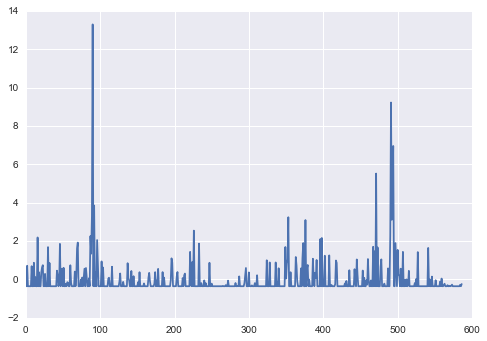

In [271]:
plt.plot(qdata)

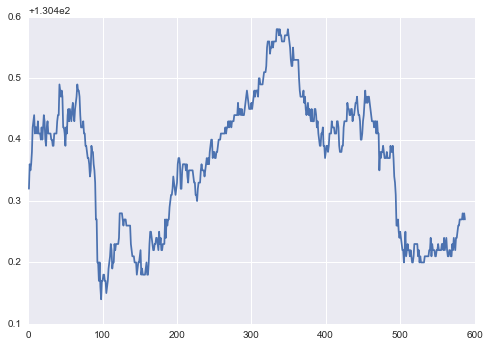

In [213]:
plt.plot(dataframe['price'])

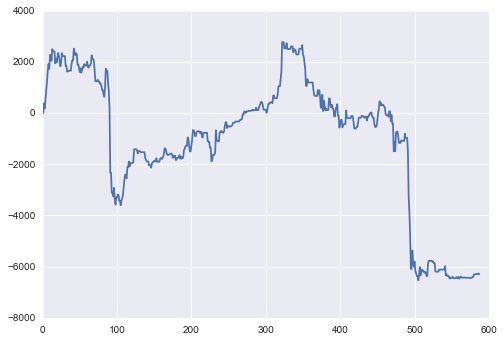

In [214]:
plt.plot(dataframe['mmcumsum'])

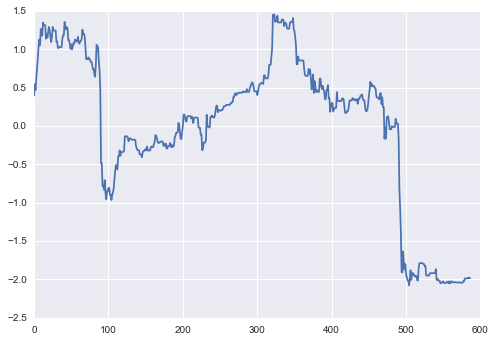

In [250]:
plt.plot(mdata)

In [215]:
from mpl_toolkits import mplot3d

def plot_3D(x, y, z, elev=0, azim=-90):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(x, y, z, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('q')
    ax.set_ylabel('m')
    ax.set_zlabel('p')

[ 1.  1.  1.] [[ inf  inf  inf]
 [ inf  inf  inf]
 [ inf  inf  inf]]


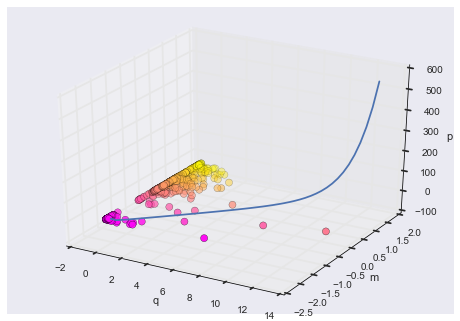

In [274]:
#xdata = np.linspace(0, 4, 50)
#y = func(qdata, 1, , mdata)
#ydata = y + 0.2 * np.random.normal(size=len(xdata))

#popt, pcov = curve_fit(func, (qdata, mdata), pdata, bounds=([0, 0, 0], [1., 1., 1.]))
popt, pcov = curve_fit(func, (qdata, mdata), pdata)

print(popt, pcov)
qfinelin = np.linspace(0.1, qdata.max(), fine)
mfinelin = np.linspace(mdata.min(), mdata.max(), fine)
curve = func((qfinelin, mfinelin), popt[0], popt[1], popt[2])
#plot_3D(qdata, mdata, pdata)
ax = plt.subplot(projection='3d')
ax.scatter3D(qdata, mdata, pdata, c=mdata, s=50, cmap='spring')
ax.plot(qfinelin, mfinelin, curve)
#ax.view_init(elev=elev, azim=azim)
ax.set_xlabel('q')
ax.set_ylabel('m')
ax.set_zlabel('p')

In [256]:
print(mdata.max(), mdata.min())
print(pdata.max(), pdata.min())

1.45183200268 -2.07656603424
3.4646282527 -4.84275468552


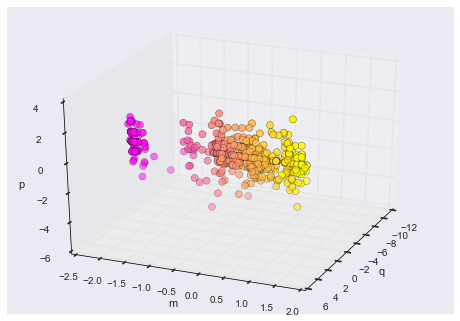

In [257]:
interact(plot_3D, x=fixed(qdata), y=fixed(mdata), z=fixed(pdata), elev=[-90, 90], azip=(-180, 180));

[ 1.  1.  1.]


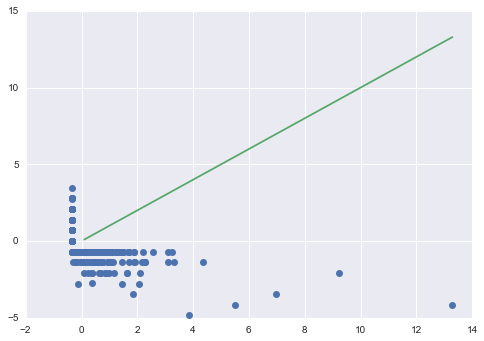

In [275]:
plt.plot(qdata, pdata, 'o')
poptlin, pcovlin = curve_fit(func, (qdata, mdata), pdata)
print(poptlin)
qfinelin = np.linspace(0.1, qdata.max(), fine)
curve = func2((qfinelin, 0), poptlin[0], poptlin[1])
plt.plot(qfinelin, curve, label='fit')

In [ ]:

ax = plt.subplot(projection='3d')
ax.scatter3D(x, y, z, c=y, s=50, cmap='spring')
ax.view_init(elev=elev, azim=azim)
ax.set_xlabel('q')
ax.set_ylabel('m')
ax.set_zlabel('p')

[-1.1482790445462896e-05, 9.0158117227143716e-06, 1.7492565968451636e-06, -3.0611886308556639e-06, -2.4158382929697237e-05]


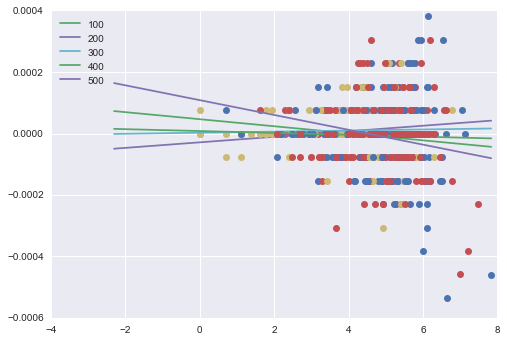

In [218]:
qdataln = qdataln.reshape(qdataln.shape[0], 1)
qfinelinln = np.log(np.linspace(0.1, qdata.max(), fine))
ret =[]
def f1(x, y, start, end):
    x1 = x[start:end]
    y1 = y[start:end]
    plt.plot(x1, y1, 'o')
    clf = linear_model.LinearRegression()
    clf.fit(x1.reshape(x1.shape[0], 1), y1)
    predict = clf.predict(qfinelinln.reshape(qfinelinln.shape[0],1))
    plt.plot(qfinelinln, predict, '-', label=end)
    return clf.coef_[0]
    
for i in range(0, 500, 100):
    ret.append(f1(qdataln, pdataln, i,i+100))

plt.legend(loc='best')
print(ret)

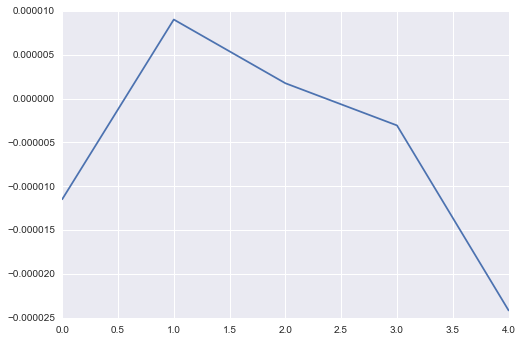

In [219]:
plt.plot(ret)

[  1.00000000e-06   5.15102051e+01   1.03020409e+02   1.54530613e+02
   2.06040817e+02   2.57551021e+02   3.09061225e+02   3.60571429e+02
   4.12081633e+02   4.63591838e+02   5.15102042e+02   5.66612246e+02
   6.18122450e+02   6.69632654e+02   7.21142858e+02   7.72653062e+02
   8.24163266e+02   8.75673470e+02   9.27183674e+02   9.78693878e+02
   1.03020408e+03   1.08171429e+03   1.13322449e+03   1.18473469e+03
   1.23624490e+03   1.28775510e+03   1.33926531e+03   1.39077551e+03
   1.44228571e+03   1.49379592e+03   1.54530612e+03   1.59681633e+03
   1.64832653e+03   1.69983674e+03   1.75134694e+03   1.80285714e+03
   1.85436735e+03   1.90587755e+03   1.95738776e+03   2.00889796e+03
   2.06040816e+03   2.11191837e+03   2.16342857e+03   2.21493878e+03
   2.26644898e+03   2.31795918e+03   2.36946939e+03   2.42097959e+03
   2.47248980e+03   2.52400000e+03]
[  1.00000000e-06   5.15102051e+01   1.03020409e+02   1.54530613e+02
   2.06040817e+02   2.57551021e+02   3.09061225e+02   3.60571429e+0

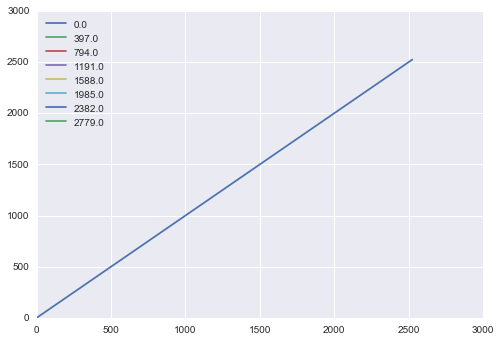

In [220]:
fine = 50
qfine = np.linspace(0.000001, qdata.max(), fine)
#mfine = np.linspace(-mdata.max(), mdata.max(), 8)
mfine = np.linspace(0, mdata.max(), 8)
curve = func((qfine, 0), popt[0], popt[1], popt[2])
curve2 = func((qfine, mdata.max()), popt[0], popt[1], popt[2])
print(qfine)
print(curve)
for i in mfine:
    curvet = func((qfine, i), popt[0], popt[1], popt[2])
    plt.plot(qfine, curvet, label=i)
plt.legend(loc='best')
#plt.plot(xfine, curve2, 'b-')
#plt.plot(xdata, pdata)